In [1]:
import networkx as nx
import numpy as np
import random as rd
from scipy.sparse import csc_matrix
from IPython.display import Image
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

# Paths
A path in a network is a sequence of edges connecting two nodes.

In [2]:
# generate a matrix randomly filled with 0 and 1
N = 8
A = np.random.randint(2,size=(N,N))
A

array([[1, 0, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1]], dtype=int32)

In [3]:
# make the matrix A symmetric by using np.tril(A, k=0) to get an undirected network
# k : [int, optional, 0 by default]
#           Diagonal we require; k>0 means diagonal above main diagonal or vice versa.
np.tril(A)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1]], dtype=int32)

In [4]:
np.tril(A,1)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1]], dtype=int32)

In [5]:
np.tril(A,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0]], dtype=int32)

In [6]:
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops
A_symmetric

array([[0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0]], dtype=int32)

In [7]:
# alternatively, a symmetric matrix having no diagonal elements can be obtained:
A_sym = np.tril(A,-1) + np.tril(A, -1).T
A_sym

array([[0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0]], dtype=int32)

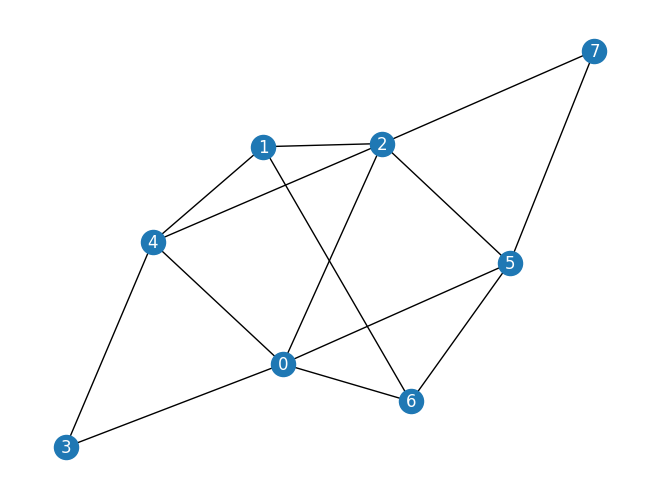

In [8]:
# time to draw a corresponding network
G = nx.from_numpy_array(A_symmetric)
nx.draw(G,with_labels=True,font_color='w')

In [9]:
# nx.all_simple_paths(G, start_node, end_node)
# A simple path is one without any cycles
list(nx.all_simple_paths(G, 1, 6))

[[1, 2, 0, 5, 6],
 [1, 2, 0, 6],
 [1, 2, 4, 0, 5, 6],
 [1, 2, 4, 0, 6],
 [1, 2, 4, 3, 0, 5, 6],
 [1, 2, 4, 3, 0, 6],
 [1, 2, 5, 0, 6],
 [1, 2, 5, 6],
 [1, 2, 7, 5, 0, 6],
 [1, 2, 7, 5, 6],
 [1, 4, 0, 2, 5, 6],
 [1, 4, 0, 2, 7, 5, 6],
 [1, 4, 0, 5, 6],
 [1, 4, 0, 6],
 [1, 4, 2, 0, 5, 6],
 [1, 4, 2, 0, 6],
 [1, 4, 2, 5, 0, 6],
 [1, 4, 2, 5, 6],
 [1, 4, 2, 7, 5, 0, 6],
 [1, 4, 2, 7, 5, 6],
 [1, 4, 3, 0, 2, 5, 6],
 [1, 4, 3, 0, 2, 7, 5, 6],
 [1, 4, 3, 0, 5, 6],
 [1, 4, 3, 0, 6],
 [1, 6]]

In [10]:
# among them, the shortest is:
nx.shortest_path(G, 1, 6)

[1, 6]

note that this function returns only one of them, missing the others [1,3,6] and [1,7,6]

In [11]:
# to get all the shortest paths,
shortest_paths = []
target = len(nx.shortest_path(G, 1, 6))
for i in list(nx.all_simple_paths(G, 1, 6)):
    if len(i)==target:
        shortest_paths.append(i)
shortest_paths

[[1, 6]]

In [12]:
# of course there is a function to return all shortest paths:
list(nx.all_shortest_paths(G,1,6))

[[1, 6]]

Note that a path length is defined here by the number of edges in the path, not the number of nodes, which implies
nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
for nodes  u  and  v .

# components

True
1
# components: 2


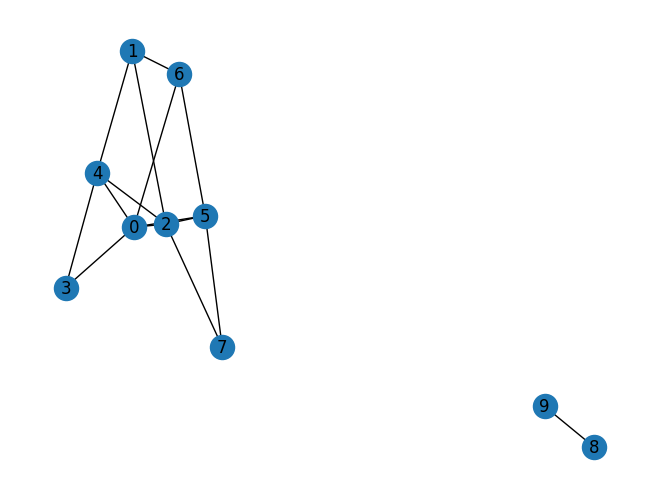

In [13]:
# we can check whether a graph is connected or not by doing:
print(nx.is_connected(G))

# measuring the number of connected components
print(nx.number_connected_components(G))

G.add_edge(8,9)
nx.draw(G, with_labels=True)
print('# components:', nx.number_connected_components(G))

In [14]:
# for obtaining the lists of comnnmected nodes in the components:
list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9}]

# largest connected component
We often care about the largest connected component (lcc), which is sometimes referred to as the giant component. We can make use of Python's builtin max function in order to obtain the largest connected component. By default, Python's max function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass len as a key function:

In [15]:
max(nx.connected_components(G), key=len)

{0, 1, 2, 3, 4, 5, 6, 7}

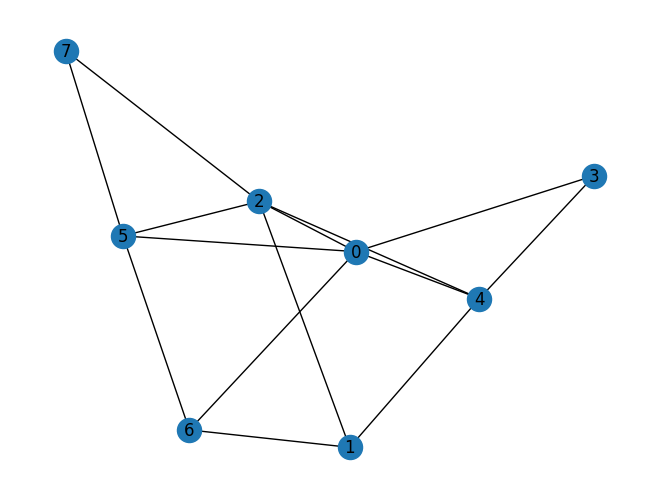

In [16]:
# generate the actual subgraph consisting of the largest connected component with the G.subgraph() function:
# this can be seen as extracting the largest one from the whole network
lcc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(lcc_nodes)
nx.draw(G_lcc, with_labels=True)

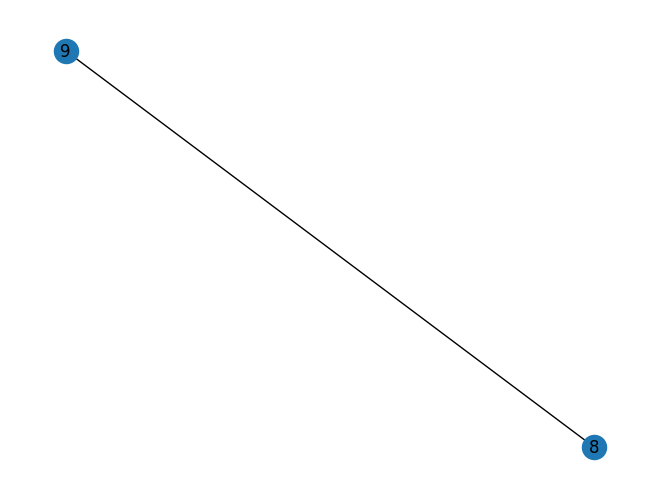

In [17]:
# sure you can do the same to the smallest one:
lcc_nodes = min(nx.connected_components(G), key=len)
G_scc = G.subgraph(lcc_nodes)
nx.draw(G_scc, with_labels=True)

## Exercise 1
Consider the network from the 2nd paper exercise 2 (generated by the next cell).



(ii) Print the different components (1pt)

(iii) Compute the clustering coefficient, diameter and density of the lcc-network (2pts)

(iv) Find the number of d=3 paths between nodes 2 and 3 (1pt)

(v) Print out all the d=3 pathes between nodes 2 and 3 (1pt)

(vi) identify the node pair with the highst number of d=3 pathes (1pt)

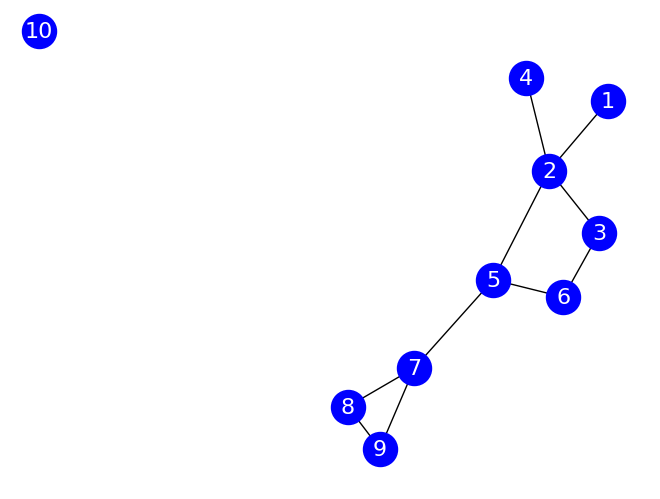

In [18]:
# a given graph:
G = nx.Graph()
G.add_nodes_from(range(1,11))
edge_list = [(1,2),(2,3),(2,4),(2,5),(3,6),(5,6),(5,7),(7,8),(7,9),(8,9)]
G.add_edges_from(edge_list)
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=600,
        font_color='white',
        font_size=16,
        )

## (i) Print the adjacency matrix and the edgelist of the network (1pt)

In [19]:
print(nx.adjacency_matrix(G).todense())

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [20]:
# that was the easiest way to go. alternatively,
adj = np.zeros((10, 10))

for i in range(1, G.number_of_nodes()):
  for j in range(1, G.number_of_nodes()):
    if ((i, j) in G.edges) == True:
      adj[i][j] = 1

adj = np.delete(adj, (0), axis=0)
adj = np.delete(adj,(0), axis=1)     
print('adjacent matrix :')
print(adj)  

adjacent matrix :
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]]


In [21]:
print('edge list :')
list(G.edges())

edge list :


[(1, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 6),
 (5, 6),
 (5, 7),
 (7, 8),
 (7, 9),
 (8, 9)]

## (ii) Print the different components

In [22]:
list(nx.connected_components(G))

[{1, 2, 3, 4, 5, 6, 7, 8, 9}, {10}]

## (iii) Compute the clustering coefficient, diameter and density of the lcc-network

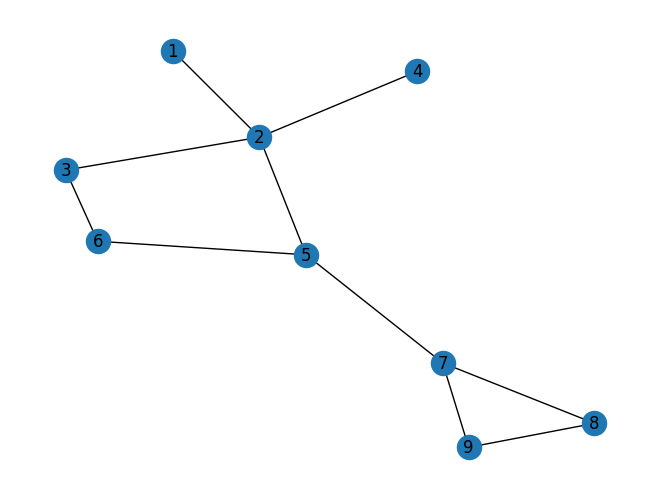

In [23]:
# get a lcc
lcc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(lcc_nodes)
nx.draw(G_lcc, with_labels=True)

In [24]:
# the density of a graph is defined as the ratio of the number of edges to the one of nodes
density = len(G_lcc.edges())/len(G_lcc.nodes())
print(round(density,3))

1.111


In [25]:
# a diameter refers to a length of the longest shortest path, i.e., the largest distance between any pair of nodes
nx.diameter(G_lcc)

4

In [26]:
# clustering coefficient is a measure of closeness between a given node's neighbors
# to be specific, for a given node i, its clustering coefficient is defined as the fraction between the existing linkes among its k_i neighbors (e_i) and the maximal possible number of links.
# C_i = e_i / (k_i*(k_i-1)/2)
# e_i : the number of connected edges between i's neighbors
# k_i : the number of k's neighbors

def print_clustering_coefficients(G):
    coef_list = []
    for node in G.nodes():
        e = 0
        k = len(list(G.neighbors(node)))
        k_neighbor_combination = list(combinations(list(G.neighbors(node)),2))
        for i in k_neighbor_combination:
            if i in list(G.edges()):
                e+=1
        coef_list.append(round(e/(k*(k-1)/2),2))
    return coef_list

In [27]:
G_lcc.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))

In [28]:
list(G_lcc.neighbors(7))

[5, 8, 9]

In [29]:
list(combinations(list(G_lcc.neighbors(7)),2))

[(5, 8), (5, 9), (8, 9)]

In [30]:
list(combinations(list(G_lcc.neighbors(7)),2))[0] in list(G_lcc.edges())

False

## (iv) Find the number of d=3 paths between nodes 2 and 3 (1pt)
## (v) Print out all the d=3 pathes between nodes 2 and 3 (1pt)

In [31]:
d3_paths = []
for i in list(nx.all_simple_paths(G, 2, 3)):
    if len(i)==3:
        d3_paths.append(i)
print(len(d3_paths))
print(d3_paths)

0
[]


## (vi) identify the node pair with the highst number of d=3 pathes (1pt)

In [32]:
def find_d3_path(G,start,end):
    d3_paths = []
    for i in list(nx.all_simple_paths(G, start, end)):
        if len(i)==3:
            d3_paths.append(i)
    return d3_paths

In [33]:
find_d3_path(G,2,3)

[]

In [34]:
# with the use of find_d3_path in tuple,
def find_highest_d3_pair(G):
    d3_path_length = []
    node_comb = list(combinations(G.nodes(),2))
    for pair in node_comb:
        d3_path_length.append(len(find_d3_path(G,pair[0],pair[1])))
    return node_comb[np.argmax(d3_path_length)]

In [35]:
find_highest_d3_pair(G)

(2, 6)

# EXERCISE 2 (9 pts); The Vienna-subway-net

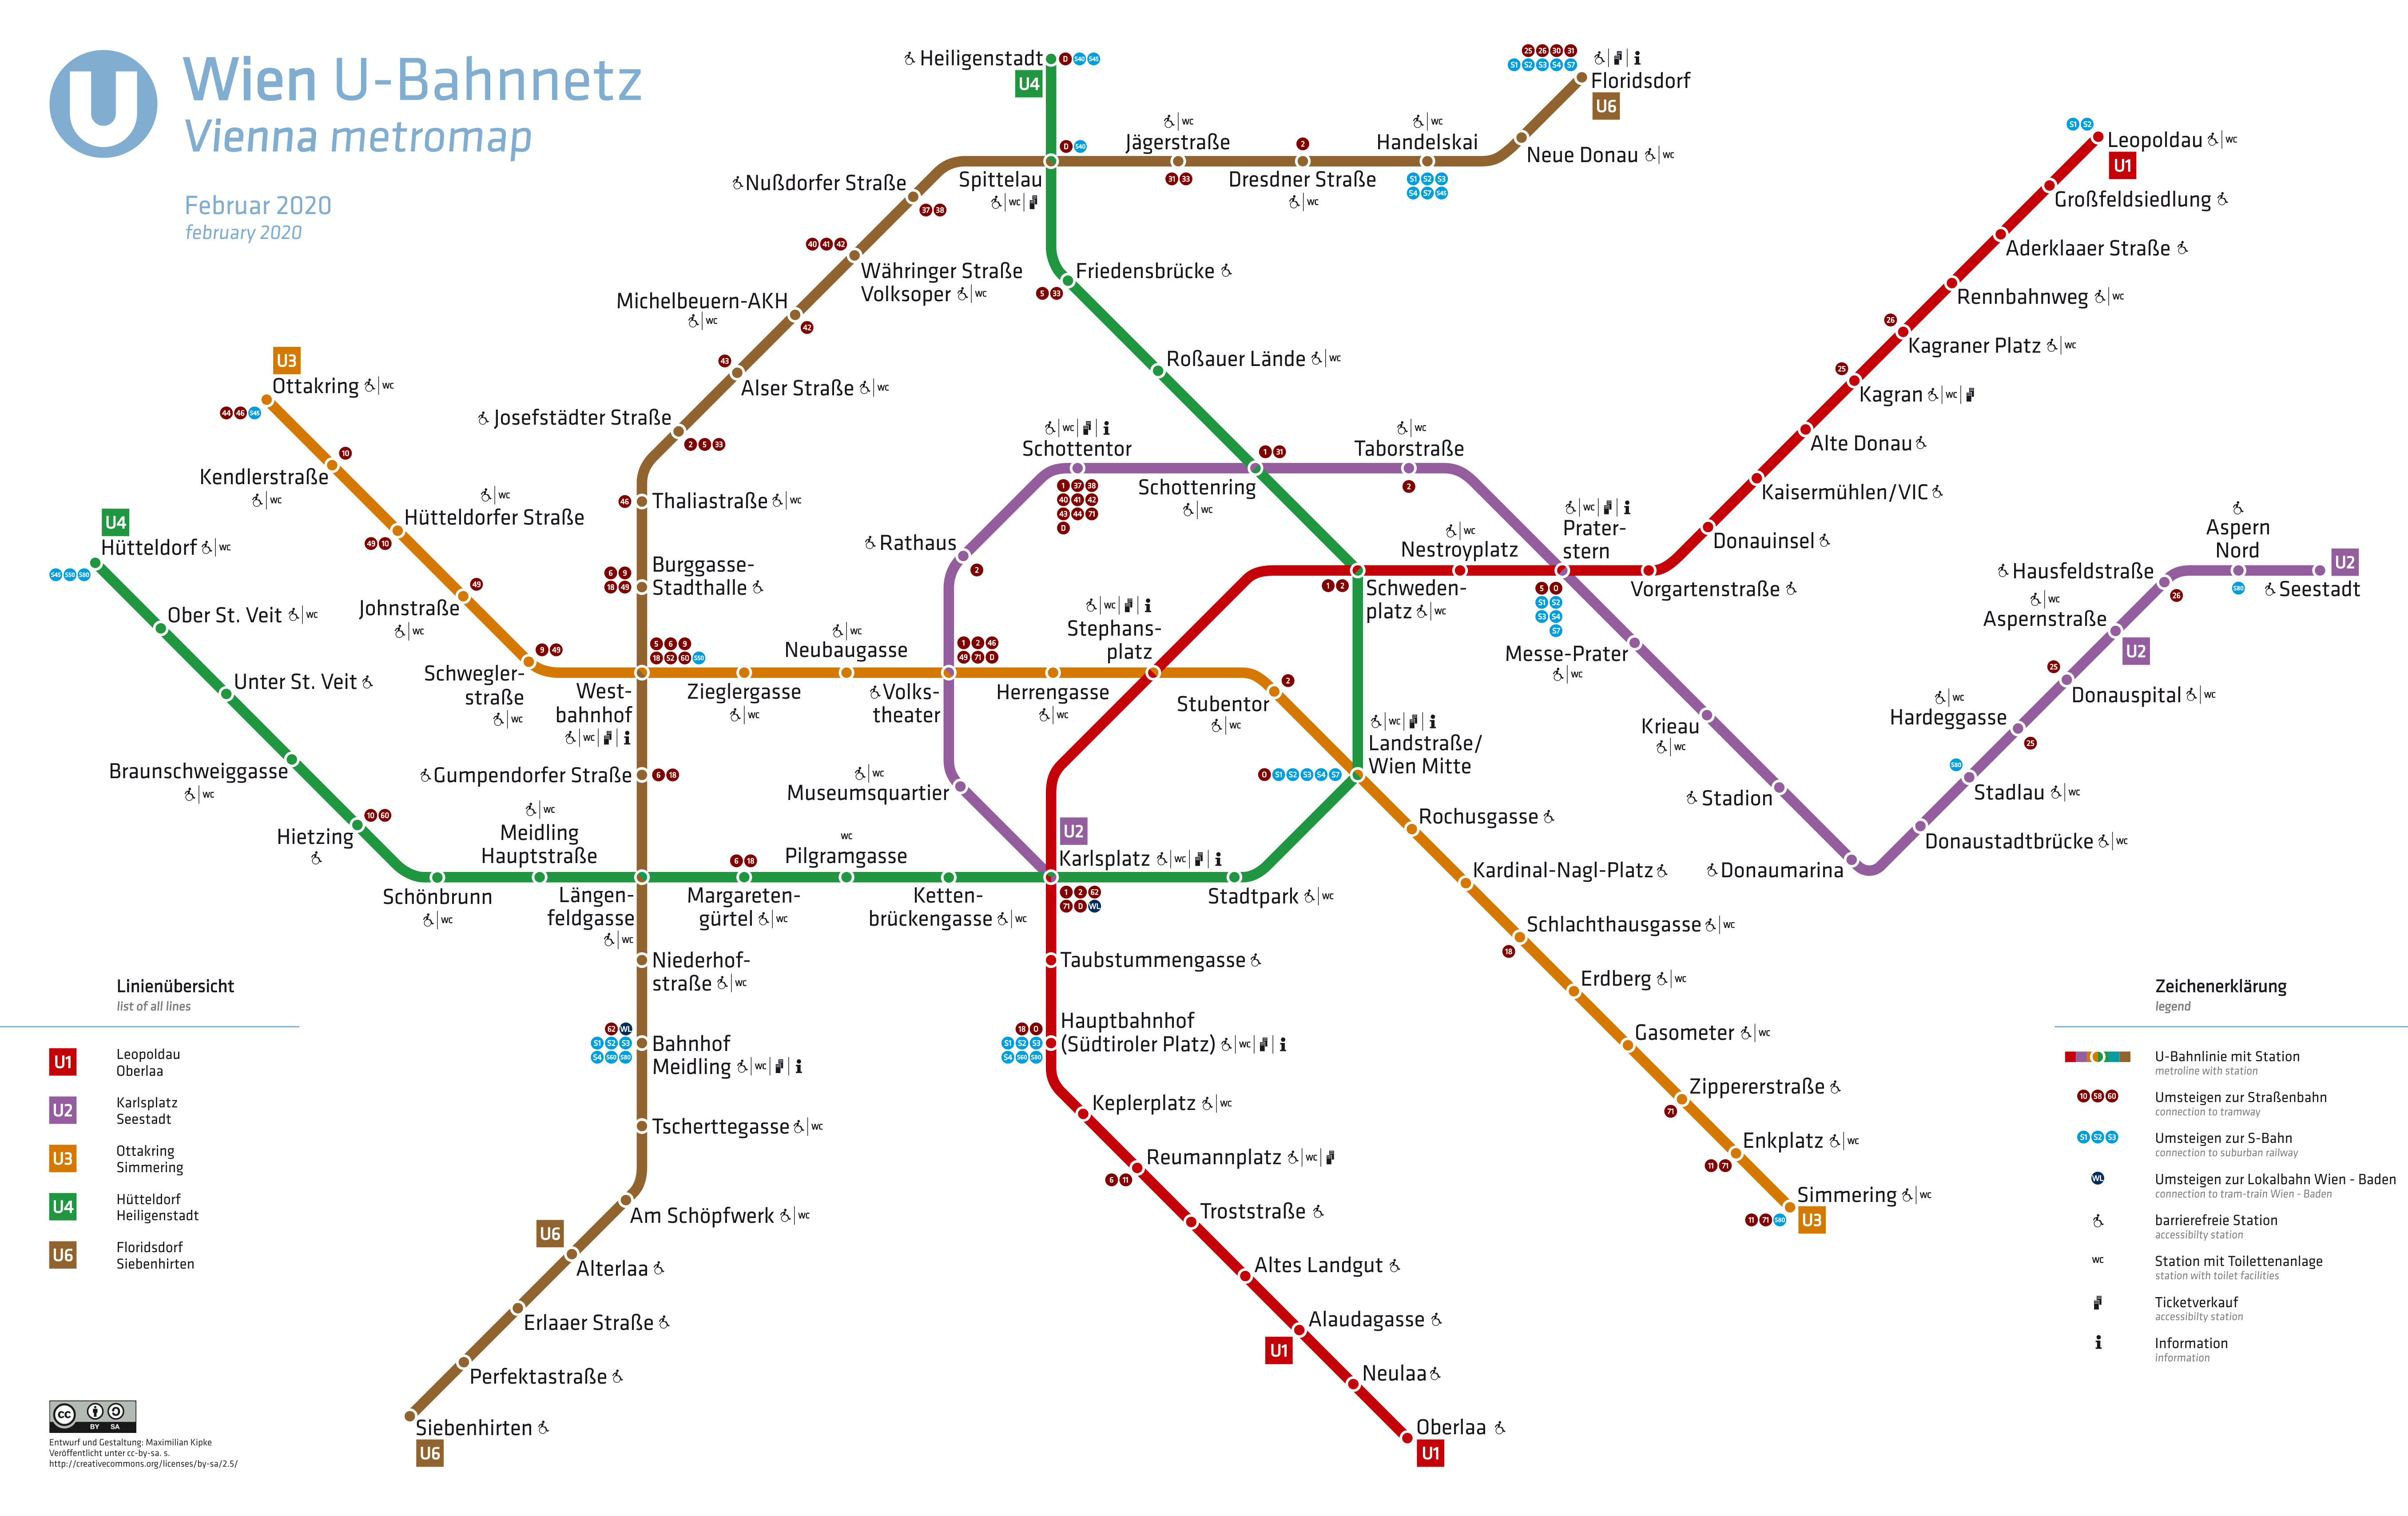

In [36]:
Image('data/vienna_subway_map.png')

In [37]:
df = pd.read_csv('data/Viennasubway.csv',delimiter = ';')
df.head()

,Start,Stop,Line,Color
0,Oberlaa,Neulaa,1,red
1,Neulaa,Alaudagasse,1,red
2,Alaudagasse,Altes Landgut,1,red
3,Altes Landgut,Troststrasse,1,red
4,Troststrasse,Reumannplatz,1,red


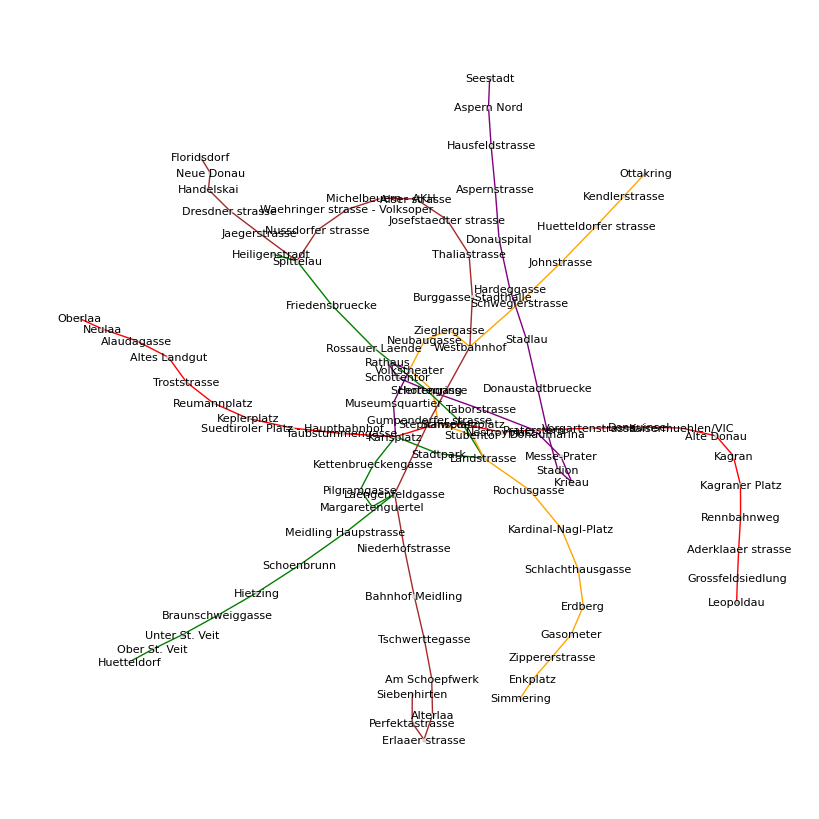

In [38]:
subway = nx.Graph()
subway = nx.from_pandas_edgelist(df, "Start", "Stop", edge_attr=["Color"])
color=nx.get_edge_attributes(subway,'Color').values()
plt.figure(figsize=(8,8))
nx.draw(subway, with_labels=True, edge_color=color, font_size=8, node_color='lightgray', node_size=5)

In [39]:
print('# nodes: ', subway.number_of_nodes())
print('# edges: ', subway.number_of_edges())
print('# lines: ', len(df['Line'].unique()))

# nodes:  98
# edges:  104
# lines:  5


In [40]:
df.groupby('Line')['Start'].count()

Line
1    23
2    19
3    20
4    19
6    23
Name: Start, dtype: int64

## Find the the three most connected stations (computationally) (1pt)
= which stations have the most neighbors?

In [41]:
num_neighbors = []
for node in subway.nodes():
    num_neighbors.append(len(list(subway.neighbors(node))))

i=0
node_list = list(subway.nodes())
most_neighbors = []
while i<3:
    most_neighbors.append(node_list[np.argmax(num_neighbors)])
    del node_list[np.argmax(num_neighbors)]
    i += 1

most_neighbors

['Karlsplatz', 'Stephansplatz', 'Schwedenplatz']

## (ii) Let's assume the subway always needs 2.5 minutes between all subsequent stations. What is the average traveling time for randomly chosen departure- and destination points? How long would the longest travel take (without detours)? (2pts)

In [42]:
# make pairs out of the node list
node_comb = list(combinations(subway.nodes(),2))
print(len(node_comb),' stations in the net')

path_len = []
for pair in node_comb:
    path_len.append(len(nx.shortest_path(subway, pair[0], pair[1])))

path_len = np.array(path_len)
print(f"average traveling time : {np.round(np.mean(path_len-1)*2.5,3)} min")
print(f"the longest travel takes {np.max(path_len-1)*2.5} min")

4753  stations in the net
average traveling time : 26.676 min
the longest travel takes 70.0 min


## (iii) Compute and plot the shortest path length distribution for the subway network. (2pts)

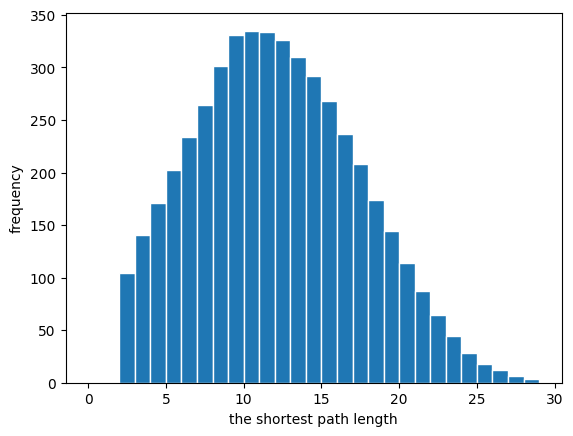

In [43]:
plt.hist(path_len, edgecolor='white', bins=range(0,30,1))
plt.xlabel('the shortest path length')
plt.ylabel('frequency')
plt.show()

## (iv) Write your own subway app: Create a function that get the subway network, a start and end station and returns the shortest connection (list of all stations to go). Try it out with start='Schoenbrunn' and end='Donauinsel'. (3pts)

In [44]:
def your_route(G, start, end):
    return nx.shortest_path(G,start,end)

In [45]:
your_route(subway, 'Schoenbrunn', 'Donauinsel')

['Schoenbrunn',
 'Meidling Haupstrasse',
 'Laengenfeldgasse',
 'Margaretenguertel',
 'Pilgramgasse',
 'Kettenbrueckengasse',
 'Karlsplatz',
 'Stephansplatz',
 'Schwedenplatz',
 'Nestroyplatz',
 'Praterstern',
 'Vorgartenstrasse',
 'Donauinsel']

## To avoid running into too many tourists you want to get around 'Stephansdom'. Or your app is connected to a news feed that informs your system about temporally occuring traffic perturbations or station closures.

(v) Add a optional argument into your function that get a station to avoid. Try again with start='Schoenbrunn' and end='Donauinsel' and avoid 'Stephansdom' (1pt)

In [46]:
def your_route(G, start, end, avoid):
    all_routes = list(nx.all_simple_paths(G,start,end))
    # exclues elements which contain the station to avoid
    for route in all_routes:
        if np.any(avoid in route):
            all_routes.remove(route)
    all_routes_len = [len(i) for i in all_routes]
    return all_routes[np.argmin(all_routes_len)]

In [47]:
your_route(subway, 'Schoenbrunn', 'Donauinsel','Stephansdom')

['Schoenbrunn',
 'Meidling Haupstrasse',
 'Laengenfeldgasse',
 'Margaretenguertel',
 'Pilgramgasse',
 'Kettenbrueckengasse',
 'Karlsplatz',
 'Stephansplatz',
 'Schwedenplatz',
 'Nestroyplatz',
 'Praterstern',
 'Vorgartenstrasse',
 'Donauinsel']

## (extra) graphical representation of your path on the network with differnet colors for start, end and avoided node (+1pt)

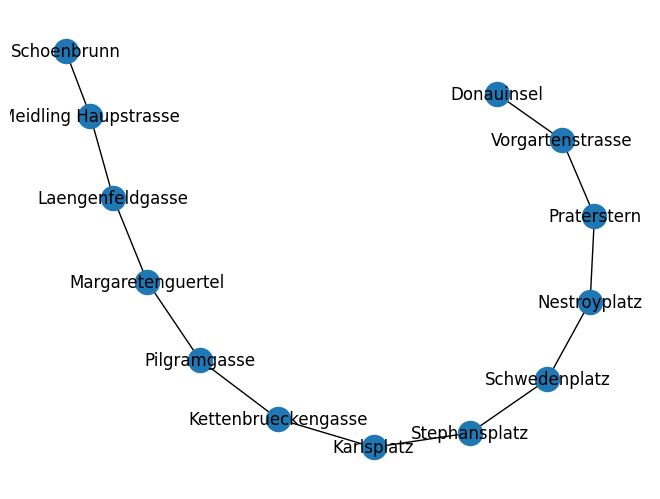

In [48]:
S = nx.Graph()
node_list = your_route(subway, 'Schoenbrunn', 'Donauinsel','Stephansdom')
S.add_nodes_from(node_list)

edge_list = []
for i in range(len(node_list)-1):
    edge_list.append((node_list[i],node_list[i+1]))
S.add_edges_from(edge_list)

nx.draw(S, with_labels=True)

In [49]:
len(edge_list)

12

In [50]:
# need to get line numbers and their colors
# to this end, extract rows concerning the route
myS = pd.DataFrame(columns=['Start','Stop','Line','Color'])
for idx, row in df.iterrows():
    for pair in edge_list:
        if (row['Start']==pair[0]) & (row['Stop']==pair[1]):
            myS.loc[len(myS.index)]=row
myS

,Start,Stop,Line,Color
0,Karlsplatz,Stephansplatz,1,red
1,Stephansplatz,Schwedenplatz,1,red
2,Schwedenplatz,Nestroyplatz,1,red
3,Nestroyplatz,Praterstern,1,red
4,Praterstern,Vorgartenstrasse,1,red
5,Vorgartenstrasse,Donauinsel,1,red
6,Schoenbrunn,Meidling Haupstrasse,4,green
7,Meidling Haupstrasse,Laengenfeldgasse,4,green
8,Laengenfeldgasse,Margaretenguertel,4,green
9,Margaretenguertel,Pilgramgasse,4,green


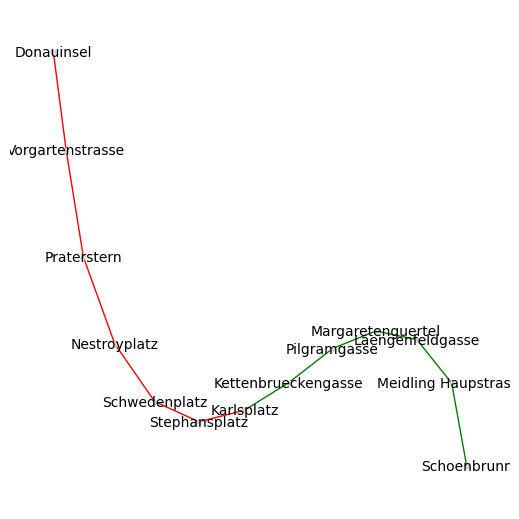

In [51]:
subway = nx.Graph()
subway = nx.from_pandas_edgelist(myS, "Start", "Stop", edge_attr=["Color"])
color=nx.get_edge_attributes(subway,'Color').values()
plt.figure(figsize=(5,5))
nx.draw(subway, with_labels=True, edge_color=color, font_size=10, node_color='lightgray', node_size=10)

# Random graphs with the use of Python's random module

In [60]:
# random.random
# Often in an algorithm, we need something to happen with some probability  p . The canonical way to decide whether or not such an event happens is to generate a random number  r  between 0 and 1, and if  r<p , then the event occurs. The random.random() function returns just such a random number in the interval [0, 1).

rd.random()

0.0031134865102984133

In [61]:
# random.choice
# When we have a population of discrete choices and we need to select one at random, we use random.choice(). For example, instead of "eeny, meeny, miny, moe," we can use random.choice to choose a random name:

names = ['Alice', 'Bob', 'Cathy', 'Dan']
rd.choice(names)

'Cathy'

In [62]:
# random.sample
# If we have a collection and we need to select more than one element without replacement, we use random.sample(). For example, to choose two nodes at random from the nodes in a graph, we can use the following:

rd.sample(names, 2)

['Alice', 'Cathy']

In [63]:
# random.choices
# choice options at random with given weights
# We use random.choices() when we need to choose an element from a collection when the chances of selecting each element are not identical. For an example, let's assume Alice, Bob, and Carol are in a raffle drawing. Alice bought one ticket, Bob bought three tickets, and Carol bought four tickets. We can simulate ten different draws of this raffle, replacing the drawn ticket each time, with the following code:

names = ['Alice', 'Bob', 'Carol']
tickets = [1, 3, 4]

for _ in range(10):
    print(rd.choices(names, tickets))

['Bob']
['Carol']
['Carol']
['Bob']
['Bob']
['Alice']
['Bob']
['Bob']
['Carol']
['Carol']


In [65]:
# By specifying the keyword argument k=, we can choose k items from the collection with replacement:
# The weights provided to random.choices do not have to be integers -- any numeric weights are fine.
rd.choices(names, tickets, k=10)

['Bob',
 'Carol',
 'Carol',
 'Alice',
 'Carol',
 'Bob',
 'Carol',
 'Carol',
 'Carol',
 'Alice']

# Random Network Model

The random network model, as formulated by Gilbert, has two parameters: the number of nodes  N , and the link probability  p . As in the book text, the algorithm for creating this network is as follows:
<ol>
    <li>Select a pair of nodes, say i and j.</li>
    <li>Generate a random number r between 0 and 1. If r < p, then add a link between i and j.</li>
    <li>Repeat (1) and (2) for all pairs of nodes.</li>
</ol>

We'll need a couple of tools from Python for this task:

## Generating combinations
We've previously looped over all nodes in a graph, as well as all graph edges, but this algorithm requires us to loop over all pairs of nodes, i.e. all possible edges. The itertools module in Python's standard library gives us the combinations() function, an elegant way to loop over pairs of elements in a sequence:

In [66]:
import itertools

elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

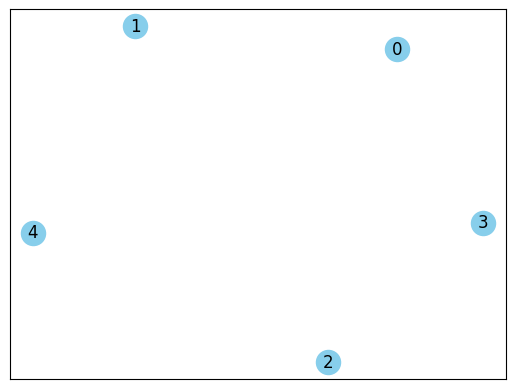

In [69]:
G = nx.Graph()
G.add_nodes_from(elements)
nx.draw_networkx(G, with_labels=True, node_color='skyblue')

## Erdös-Rényi random graph model
Instead of specifying the link probability  p , we can also generate a graph of  N  nodes with exactly  M  edges by using random.sample() to choose M of the possible edges generated with itertools.combinations():

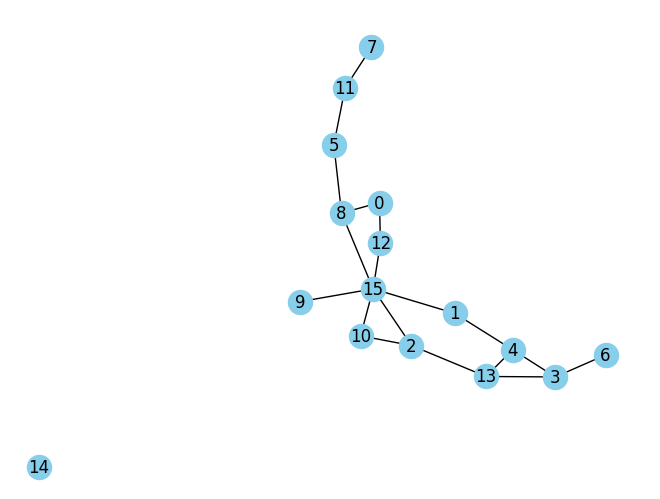

In [71]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = rd.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)

    return G

G = gnm_random_graph(16, 18)
nx.draw(G, with_labels=True, node_color='skyblue')

## Gilbert random graph model
With these tools in our toolbelt, we can code the algorithm for the Gilbert random graph model.

61 edges.


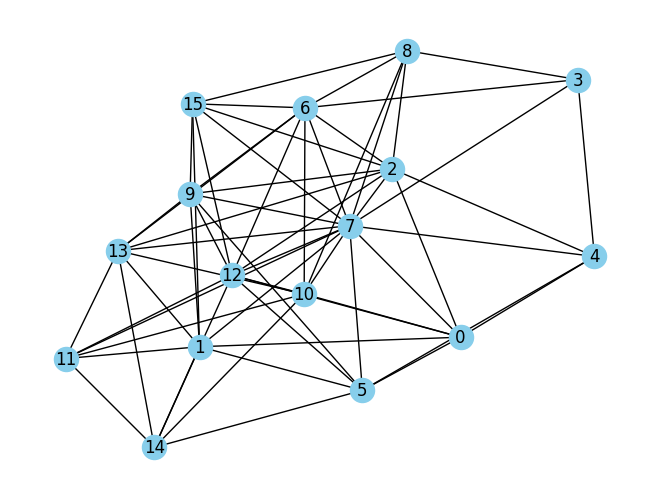

In [73]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for i, j in itertools.combinations(G.nodes, 2):
        r = rd.random()
        if r < p:
            G.add_edge(i, j)
        # Do nothing if r >= p

    return G

G = gnp_random_graph(16, 0.5)
nx.draw(G, with_labels=True, node_color='skyblue')
print(G.number_of_edges(), 'edges.')

## NetworkX functions
NetworkX has a function for the  Gn,p  random graph specifying number of nodes  N  and link probability  p : gnp_random_graph().

In addition, NetworkX provides gnm_random_graph(), which generates a  Gn,m  graph, where we specify the number of nodes  N  and the desired number of edges  M .

### generate a network directly from a given matrix
you can define a numpy matrix and convert it into a Graph object

[[0 1 0 1 0 1 0 0]
 [1 0 1 0 1 1 0 0]
 [0 1 0 1 0 0 0 0]
 [1 0 1 0 0 0 1 1]
 [0 1 0 0 0 1 1 1]
 [1 1 0 0 1 0 1 1]
 [0 0 0 1 1 1 0 1]
 [0 0 0 1 1 1 1 0]]


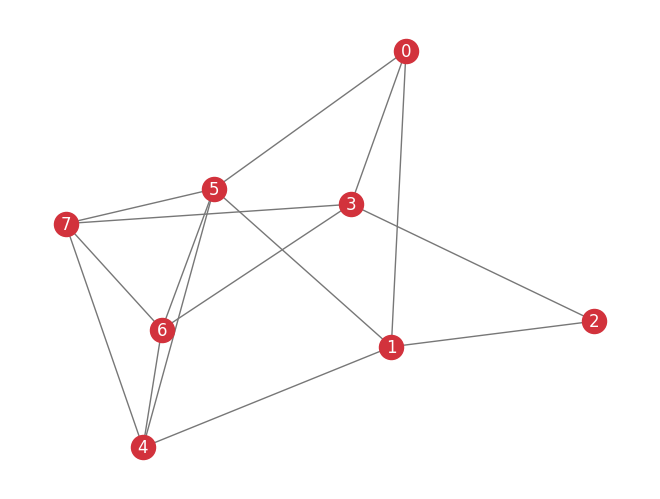

In [75]:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops
print(A_symmetric)

G = nx.from_numpy_array(A_symmetric)

nx.draw(G,
        with_labels=True,
        node_color='#d2323c',
        edge_color='#777777',
        node_size=300,
        font_color='white',
        font_size=12,
        )


[[0 1 0 1 0 1 1 1]
 [0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


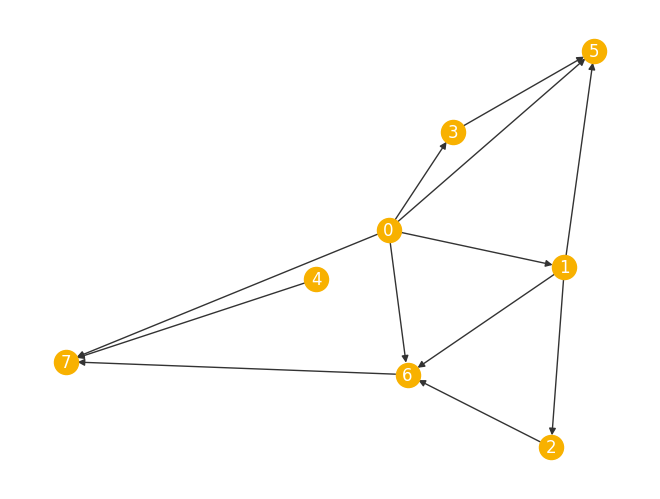

In [76]:
# for DIRECTED networks it works like this:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A[np.tril_indices(A.shape[0], -1)] = 0  # set the lower left triangle to 0
np.fill_diagonal(A, 0) # write zeros on the diagonal to avoid selfloops

print(A)

# make explicit that you want the network to be directed
G = nx.from_numpy_array(A,create_using=nx.DiGraph)

nx.draw(G,
        with_labels=True,
        node_color='#f8b100',
        edge_color='#333333',
        node_size=300,
        font_color='white',
        font_size=12,
        )

[[0.         0.74298026 0.40370535 0.49833941 0.20223887 0.39368555]
 [0.74298026 0.         0.4663159  0.28628193 0.64584518 0.49717069]
 [0.40370535 0.4663159  0.         0.91018475 0.96032312 0.58215864]
 [0.49833941 0.28628193 0.91018475 0.         0.1270133  0.01799705]
 [0.20223887 0.64584518 0.96032312 0.1270133  0.         0.66476637]
 [0.39368555 0.49717069 0.58215864 0.01799705 0.66476637 0.        ]]


{0: Text(-0.06368810485788712, 0.8030258118591765, '0'),
 1: Text(-0.6880597512528629, 0.24744091639501858, '1'),
 2: Text(0.4288297913442751, -0.1735080711300464, '2'),
 3: Text(0.9754269055440493, 0.7304737043632713, '3'),
 4: Text(-0.6655390258259539, -0.6074323614874206, '4'),
 5: Text(0.013030185048380237, -1.0, '5')}

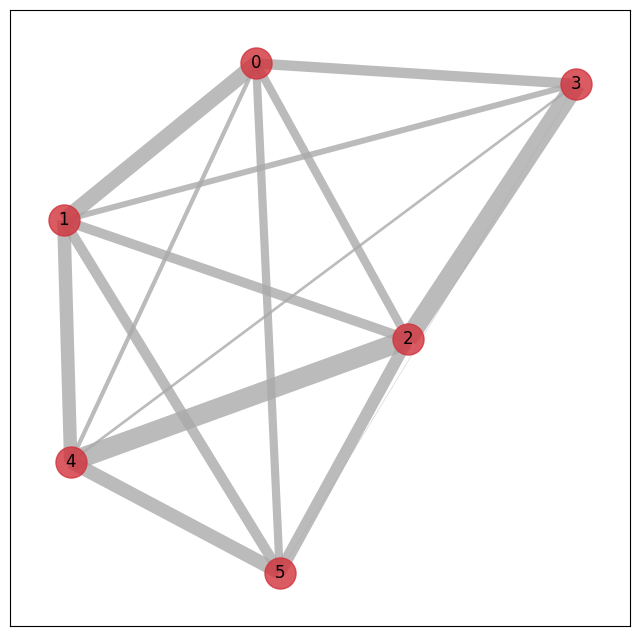

In [77]:
# and for WEIGHTED networks:
N = 6
A = np.random.uniform(0,1,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops

print(A_symmetric)


G = nx.from_numpy_array(A_symmetric)


l_w = []
for a,b in G.edges():
    l_w.append(G[a][b]['weight'])


plt.figure(figsize=(8,8))

pos = nx.spring_layout(G)

edgewidth = [15*d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos=pos, width=edgewidth,edge_color='#aaaaaa',alpha=.8)

nx.draw_networkx_nodes(G, pos=pos, node_size=500,node_color='#d2323c',alpha=.8)

nx.draw_networkx_labels(G, pos=pos)

[1. 0. 1. 0. 2. 1. 0. 1. 0. 1. 0. 3. 0. 2. 2. 0. 0. 1. 1. 0. 3. 0. 0. 2.
 1. 3. 0. 0. 0. 2. 3. 1. 1. 3. 1. 3. 0. 2. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 3. 1. 1. 3. 0. 0. 2. 1. 2. 1. 0. 1. 4. 2. 1. 2. 0. 0. 0. 0. 2. 2. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 4. 0. 1. 0. 2. 1. 1. 1. 3. 1. 0. 0. 1. 1. 3. 0. 2.
 1. 3. 1. 0.]
average degree : 1.062
# of connected components : 48
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
diameter :  15.0
average shortest path length : [1.0, 0, 4.044, 0, 1.0, 0, 5.616, 0, 0, 0, 1.333, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0]


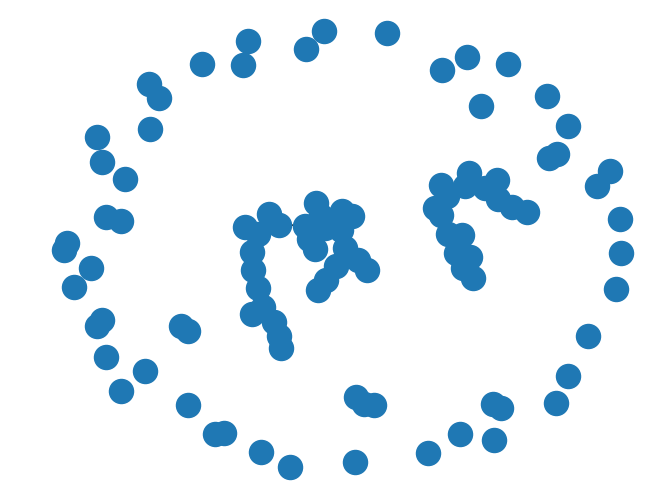

In [78]:
n = 100 # 500 takes too long..!
p = 0.01
G = gnp_random_graph(n, p)
nx.draw(G)

#average degree ⟨k⟩
k = np.zeros(n)
nodlist = list(G.nodes())
for i in range(1, G.number_of_nodes()):
  j = i-1
  k[j] = len(list(G.neighbors(nodlist[j])))
print(k)
avgk = np.average(k, weights=nodlist)
avgk = round(avgk,3)
print('average degree :', avgk)

#the number of connected components
connected = nx.number_connected_components(G)
print('# of connected components :', connected)

#diameter
dist = np.zeros((n, n))
for m in range(G.number_of_nodes()):
  for n in range(G.number_of_nodes()):
    if list(nx.all_simple_paths(G, m, n)) == []:
      dist[m-1][n-1] = 0
    else:
      dist[m-1][n-1] = nx.shortest_path_length(G, m, n)
print(dist)
print('diameter : ', np.max(dist) )

#the average shortest path length
avgsp = []
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    avgsp.append(nx.average_shortest_path_length(C))
for i in range(len(avgsp)):
  avgsp[i-1] = round(avgsp[i-1], 3)
print('average shortest path length :', avgsp)

[1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 3, 0, 2, 2, 0, 0, 1, 1, 0, 3, 0, 0, 2, 1, 3, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 3, 1, 1, 3, 0, 0, 2, 1, 2, 1, 0, 1, 4, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 2, 1, 1, 1, 3, 1, 0, 0, 1, 1, 3, 0, 2, 1, 3, 1, 1]
{0, 1, 2, 3, 4}
{0: 38, 1: 35, 2: 14, 3: 11, 4: 2}


Text(0, 0.5, 'frequency')

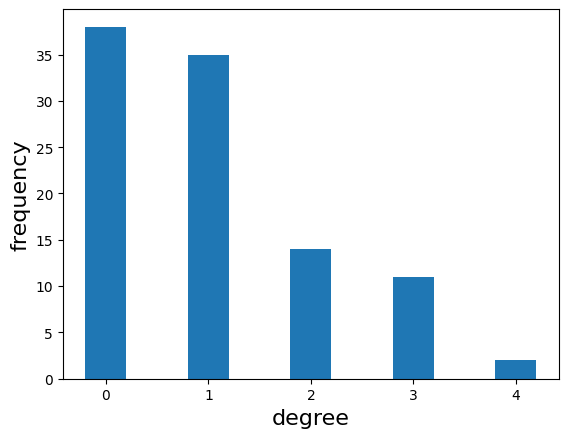

In [79]:
#plot the degree distribution
# counting the number of neighbors:
l_k = list(dict(G.degree()).values())
print(l_k)
# the set operation makes entries unique
s_k = set(l_k)
print(s_k)
# # counting the number of neighbors and store it into a dict
dict_k_frequency = {}
for k in s_k:
  dict_k_frequency[k] = l_k.count(k)
print(dict_k_frequency)
plt.bar(dict_k_frequency.keys(), dict_k_frequency.values(),width=.4)
plt.xlabel('degree',fontsize = 16)
plt.ylabel('frequency',fontsize = 16)

Text(0, 0.5, 'Average k')

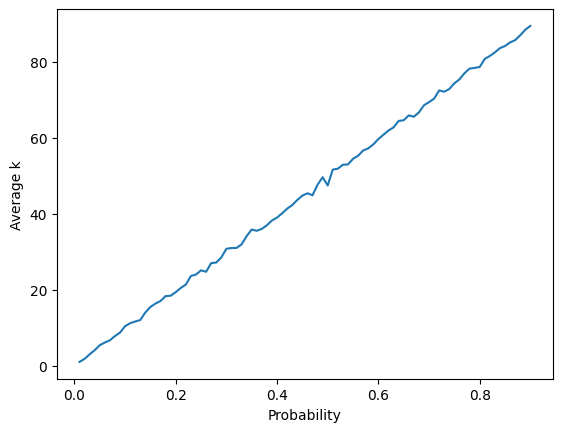

In [80]:
n = 100
p = 0.01

probv = []
avgkv = []
nodlist = list(G.nodes())

while p <= 0.9 :
 Gv = gnp_random_graph(n,p)
 k = np.zeros(n)

 for i in range(Gv.number_of_nodes()):
  j = i-1
  k[j] = len(list(Gv.neighbors(nodlist[i])))
 avgk = np.average(k, weights=nodlist)
 avgk = round(avgk,3)
 avgkv.append(avgk)
 probv.append(p)
 p = round(p + 0.01, 3)

#print(probv)
#print(avgkv)

plt.plot(probv, avgkv)
plt.xlabel("Probability")
plt.ylabel("Average k")
# average of k is linearly proportional to probaility; the more edges, the larger the average degree

Text(0, 0.5, 'size of lcc')

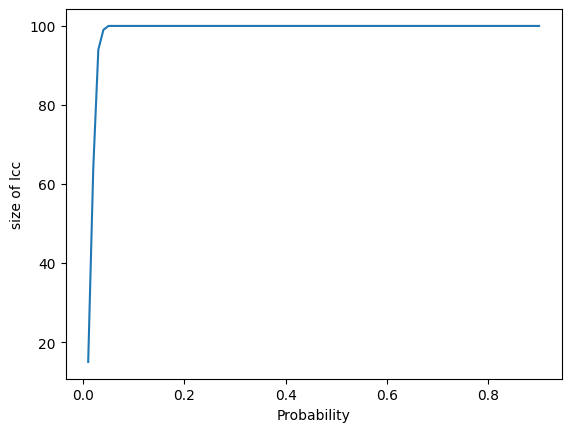

In [81]:
#(iii) Iterate over a range of connection probabilities and measure the size of the largest connected component  Slcc  now.
#(You can do both measurements for ii and iii in one loop)
#Plot  Slcc  over  p  and make sure that you can see the differnt regimes of connectedness.
n = 100
p = 0.01

probv = []
lccv = []
nodlist = list(G.nodes())

while p <= 0.9 :
 Gv = gnp_random_graph(n,p)
 cc = list(nx.connected_components(Gv))
 ccl = []
 for i in range(len(cc)):
  ccl.append(len(cc[i-1]))

 lccv.append(max(ccl))
 probv.append(p)
 p = round(p + 0.01, 3)

plt.plot(probv, lccv)
plt.xlabel("Probability")
plt.ylabel("size of lcc")
#shows a saturation behavior; despite a low probability of connenction between nodes, the nodes have a high chance to get fully connected

Text(0, 0.5, 'size of lcc')

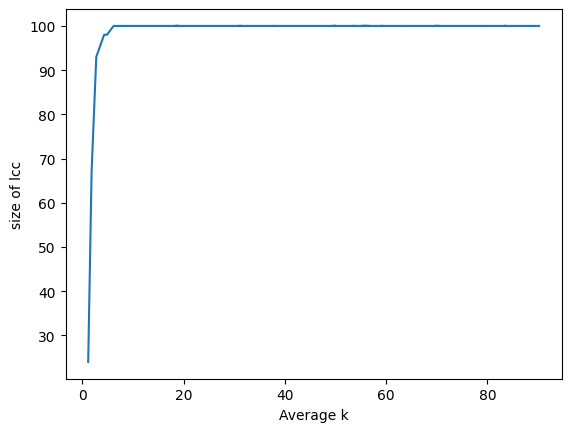

In [82]:
#combined
#Plot  Slcc  also over the average the average degree and discuss briefly what you observe
n = 100
p = 0.01

probv = []
avgkv = []
lccv = []
nodlist = list(G.nodes())

while p <= 0.9 :
 Gv = gnp_random_graph(n,p)
 k = np.zeros(n)

 for i in range(Gv.number_of_nodes()):
  j = i-1
  k[j] = len(list(Gv.neighbors(nodlist[i])))
 avgk = np.average(k, weights=nodlist)
 avgk = round(avgk,3)
 avgkv.append(avgk)

 cc = list(nx.connected_components(Gv))
 ccl = []
 for i in range(len(cc)):
  ccl.append(len(cc[i-1]))

 lccv.append(max(ccl))
 probv.append(p)
 p = round(p + 0.01, 3)

plt.plot(avgkv, lccv)
plt.xlabel("Average k")
plt.ylabel("size of lcc")
#shows a saturation behavior; as the average degree <k> is linealy proportional to probability, the graph of the size of lcc against <k> shows the same tendency. In other words, there is a high chance for nodes to be fully connedted even though each node dose not show a high dgree(or there are not so many edges between nodes)